In [1]:
## imports 
# astro
from    astropy.wcs             import WCS
from    astropy.io              import fits
import  astropy.units           as u
from    astropy.nddata          import Cutout2D
from    astropy.coordinates     import SkyCoord
from    astropy.visualization   import (MinMaxInterval, PercentileInterval, ZScaleInterval, SqrtStretch, AsinhStretch, LogStretch, ImageNormalize)
# data 
import  numpy   as np
import  pandas  as pd
# plots
import  matplotlib.pyplot as plt
# file interpretation
import ast

## file paths 
path_catalogs = 'D:\\AstroCatalogs\\AGNerds'
path_cutouts_dup = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\AGNerds\\AGNerds\\JWST_AGN_proj2\\Cutouts_duplicates'
path_cutouts_uni = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\AGNerds\\AGNerds\\JWST_AGN_proj2\\Cutouts_unique'

# Get Data

In [2]:
with open(path_catalogs + '\\Christian_Galaxy_List.csv', 'r') as file :
    galaxies = pd.read_csv(file, delimiter=',')

In [3]:
display(galaxies)

,ID,RA,Dec
0,24662,215.134796,53.055912
1,25092,215.135788,53.055618
2,26203,215.137817,53.054447
3,25407,215.140167,53.056484
4,25024,215.141388,53.059521
...,...,...,...
457,43447,214.855194,52.814644
458,45320,214.856308,52.810673
459,45319,214.857101,52.810890
460,47878,214.859207,52.806667


In [4]:
# build dictionary of data, header, and wcs for a given fits file
def GetData(fitsFile, egs=False):
    f = fits.open(fitsFile)
    if(egs):
        wcs = WCS(f[0].header, relax=True)
    else: 
        wcs = WCS(f[1].header)
    # fill dictionary with data 
    dataDict = {
        'data'      : fits.getdata(fitsFile),
        'header'    : fits.getheader(fitsFile),
        'wcs'       : wcs
    }
    f.close()
    return(dataDict)

In [5]:
# read CEERS MIRI image data
miri = {
    'miri1' : {
        # 'f1000w' : GetData(path_catalogs+'\\ceers_miri1_f1000w_i2d.fits'),
        'f1280w' : GetData(path_catalogs+'\\ceers_miri1_f1280w_i2d.fits'),
        'f770w'  : GetData(path_catalogs+'\\ceers_miri1_f770w_i2d.fits')
    },
    'miri2' : {
        # 'f1000w' : GetData(path_catalogs+'\\ceers_miri2_f1000w_i2d.fits'),
        'f1280w' : GetData(path_catalogs+'\\ceers_miri2_f1280w_i2d.fits'),
        'f770w'  : GetData(path_catalogs+'\\ceers_miri2_f770w_i2d.fits')
    },
    'miri3' :{
        'f770w'  : GetData(path_catalogs+'\\ceers_miri3_f770w_i2d.fits')
    },
    'miri6' : {
        'f770w'  : GetData(path_catalogs+'\\ceers_miri6_f770w_i2d.fits')
    }
}
print('MIRI READ')

MIRI READ


Set DATE-AVG to '2022-06-21T19:37:34.014' from MJD-AVG.
Set DATE-END to '2022-06-21T19:52:51.177' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.748835 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725268421.305 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-21T18:25:23.072' from MJD-AVG.
Set DATE-END to '2022-06-21T18:40:42.862' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.739047 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725216509.255 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T00:24:36.184' from MJD-AVG.
Set DATE-END to '2022-06-22T00:39:55.224' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.787605 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725471424.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-21T23:13:00.399' from MJD-AVG.
Set DATE-END to '2022-06-21T23:28:20.189' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.778051 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725421772.310 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

# Cutout

In [6]:
def GetCutout(
    coord,  # center sky coordinate
    wcs,    # World Coordinate System
    data,   # image data
    dl=50   # cutout size 
):
    # get position on sky 
    x, y = wcs.world_to_pixel(coord)
    # make cutout 
    cutout = Cutout2D(data, position=(x,y), size=(dl,dl), wcs=wcs, mode='partial')
    return(cutout)

In [39]:
def PlotCutout(
    ax,
    cutout,
    center, # dl/2
    title,  # title 
    marks=[],   # add markers to these coordinantes
    useNorm=None,
    showGrid=False
) : 
    if(showGrid):
        # grid lines
        ax.grid(True, color='r', linestyle='--', linewidth=0.5)
    else:
        # hide ticks
        ax.set_xticks([])
        ax.set_yticks([])
    # hide axis lables
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')

    if(marks):
        for i,coord in enumerate(marks):
            # determine color 
            if(i==0):   c='green'
            else:       c='red'
            # plot mark
            ax.plot_coord(coord, "x", color=c)
    else:
        # circle center coord 
        circle = plt.Circle((center,center), 10, fc=(0,0,0,0), ec="red")
        ax.add_patch(circle)

    # set title
    ax.set_title(title,fontsize=14)
    
    # plot image
    if(useNorm == None) : 
        ax.imshow(cutout.data, origin='lower', cmap='gray')
    else:
        norm1 = ImageNormalize(cutout.data, interval=PercentileInterval(useNorm), stretch=AsinhStretch())
        ax.imshow(cutout.data, origin='lower', cmap='gray', norm=norm1)

In [40]:
def MakePlotOfSrc_MultiBand(
    coord,  # SkyCoord of center RA and Dec (SkyCoord)
    wcs,    # World Coordinate System (list)
    data,   # image data (list)
    band,   # title of subplot (list)
    dl,     # cutout size (list)
    marks=[],   # add markers to these coordinantes.
    title=None,  # plot title (string)
    useNorm=None,   # normalization percent interval
    showGrid=False,
    fileName=None,     # name and path of file to save to
    showPlot=True
):
    # verify all lists are same length
    n = len(wcs)
    if(n!=len(data) and n!=len(band) and n!=len(dl)) : 
        print('[!] lists are not same size')
        return 

    # get cutous
    cutout = [None] * n
    for i in range(n) : 
        cutout[i] = GetCutout(
            coord=coord, # center sky coordinate
            wcs=wcs[i],     # World Coordinate System
            data=data[i],   # image data
            dl=dl[i]        # cutout size 
        )
    
    # make figure 
    fig = plt.figure(figsize=( 1+(3*n), 4.25 ), facecolor='w')
    ax = [None] * n
    for i in range(n) :
        ax[i] = fig.add_subplot( 1,n,(i+1), projection=cutout[i].wcs)

    # plot settings 
    if(showGrid) : 
        fig.supxlabel('RA')
        fig.supylabel('Dec')
    if(title):
        fig.suptitle(title, fontsize=16)

    # plot image cutout on axis
    for i in range(n): 
        PlotCutout(
            ax=ax[i],
            cutout=cutout[i],
            center=dl[i]/2.0, 
            title=band[i],
            marks=marks,
            useNorm=useNorm,
            showGrid=showGrid
        )

    # save 
    if(fileName):
        plt.savefig(    
            fileName,
            bbox_inches ="tight",
            pad_inches=0.05,
            facecolor='w',
            edgecolor='w'
        )

    if(showPlot): plt.show()
    plt.close()

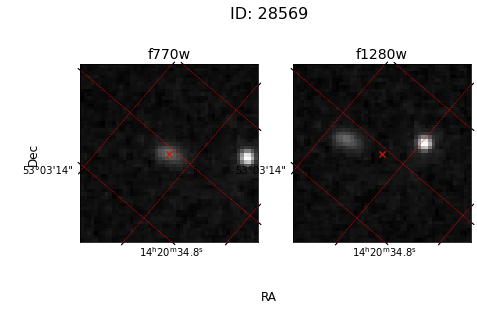

In [42]:
i = 10
id_i = int(galaxies.iloc[i]['ID'])
coord_i = SkyCoord(galaxies.iloc[i]['RA']*u.degree, galaxies.iloc[i]['Dec']*u.degree)
field_i = 'miri1'
bands_i = ['f770w', 'f1280w']
wcs_i  = [miri[field_i][bands_i[0]]['wcs'],  miri[field_i][bands_i[1]]['wcs'] ]
data_i = [miri[field_i][bands_i[0]]['data'], miri[field_i][bands_i[0]]['data']] 

MakePlotOfSrc_MultiBand(
    coord=coord_i,  # SkyCoord of center RA and Dec (SkyCoord)
    wcs=wcs_i,    # World Coordinate System (list)
    data=data_i,   # image data (list)
    band=bands_i,   # title of subplot (list)
    dl=[50,50],     # cutout size (list)
    marks=[coord_i,coord_i],   # add markers to these coordinantes.
    title="ID: " + str(id_i),  # plot title (string)
    useNorm=None,   # normalization percent interval
    showGrid=True,
    fileName=None,     # name and path of file to save to
    showPlot=True
)

In [34]:
# for saving to fits file: (scroll to bottom)
# https://docs.astropy.org/en/stable/nddata/utils.html